# {Healthcare}📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



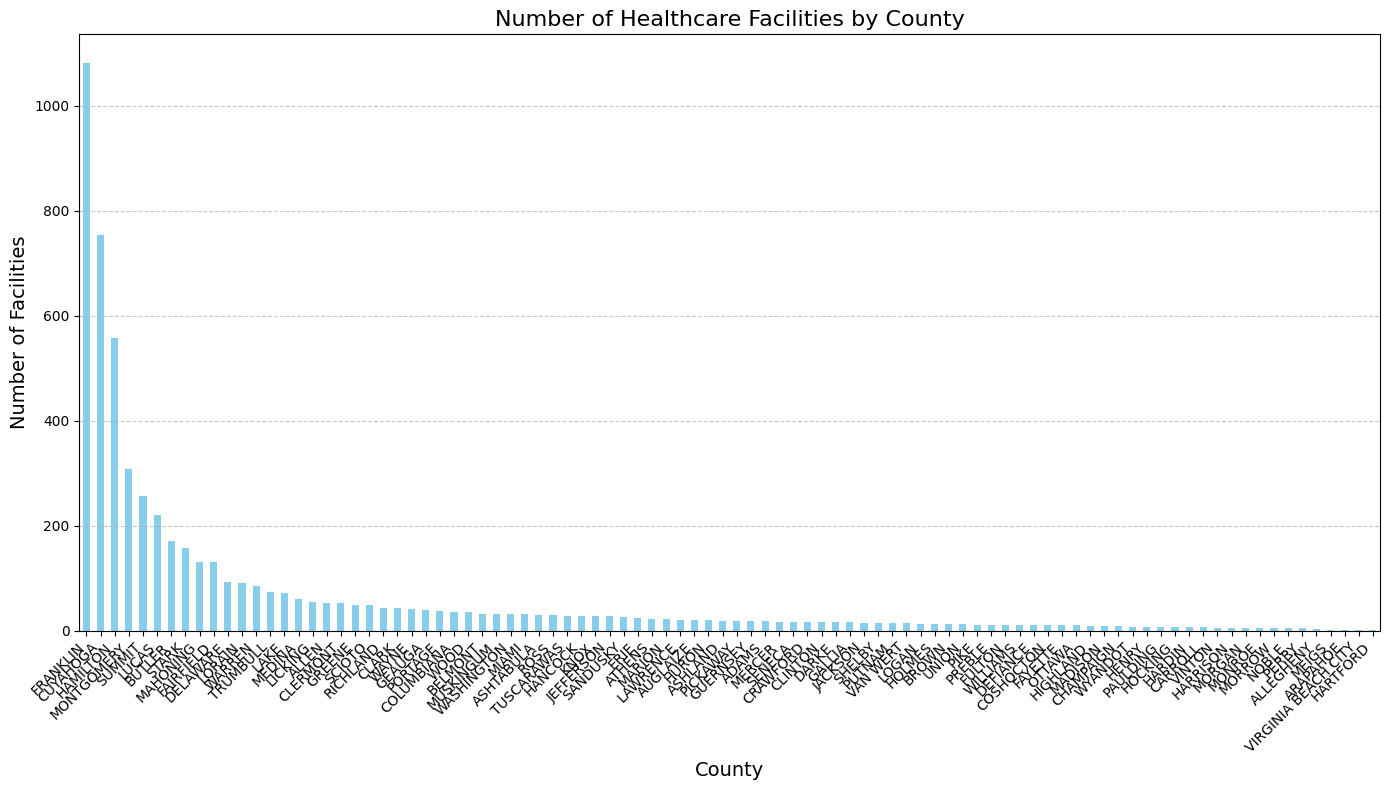

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("assets/data/FacilityListingByCounty-20250422-114439.csv")

facilities_by_county = df['CNTYNAME'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
facilities_by_county.plot(kind='bar', color='skyblue')
plt.title("Number of Healthcare Facilities by County", fontsize=16)
plt.xlabel("County", fontsize=14)
plt.ylabel("Number of Facilities", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


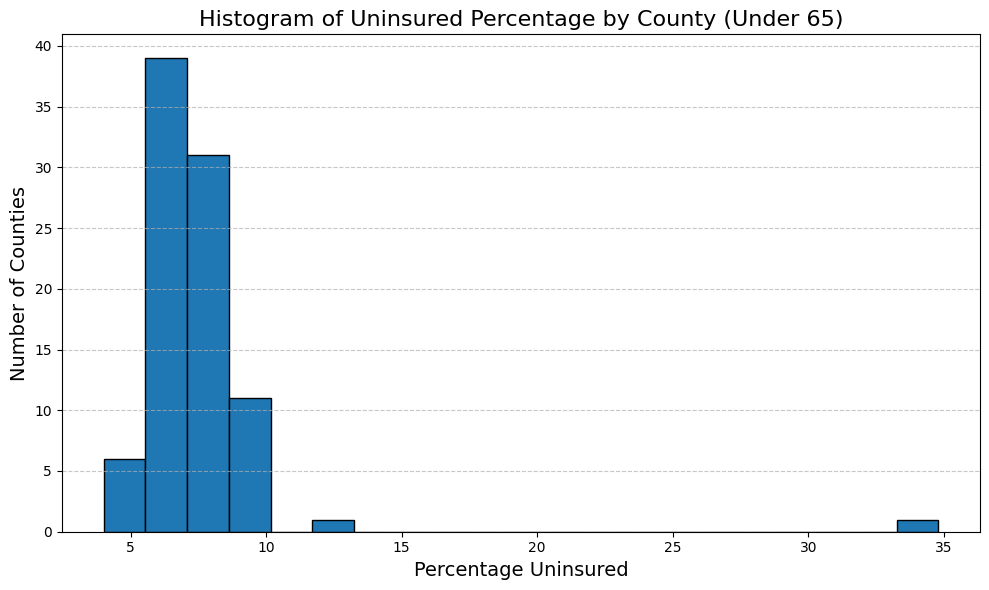

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = "assets/data/Insurance Coverage vs County.csv"
uninsured = pd.read_csv(file_path, skiprows=3)

uninsured.columns = [col.strip() for col in uninsured.columns]

percent_col = '%'
if percent_col not in uninsured.columns:
    for col in uninsured.columns:
        if '%' in col:
            percent_col = col
            break

uninsured[percent_col] = (
    uninsured[percent_col]
    .astype(str)
    .str.rstrip('%')
    .astype(float)
)

plt.figure(figsize=(10, 6))
plt.hist(uninsured[percent_col].dropna(), bins=20, edgecolor='black')
plt.title('Histogram of Uninsured Percentage by County (Under 65)', fontsize=16)
plt.xlabel('Percentage Uninsured', fontsize=14)
plt.ylabel('Number of Counties', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


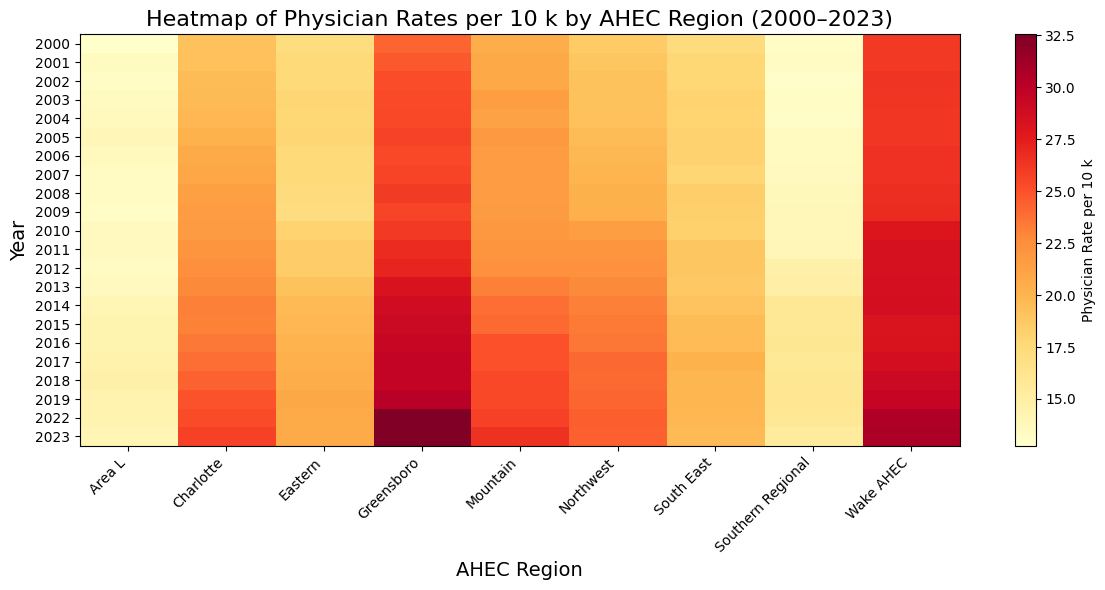

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

csv_path = "assets/data/Healthcare per rural area.csv"
df = pd.read_csv(csv_path)

df.columns = ["AHEC"] + [col.strip() for col in df.columns[1:]]

for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

heat_data = df.set_index("AHEC").T

plt.figure(figsize=(12, 6))
plt.imshow(heat_data, aspect="auto", interpolation="nearest", cmap="YlOrRd")
plt.colorbar(label="Physician Rate per 10 k")

plt.xticks(
    ticks=range(len(heat_data.columns)), 
    labels=heat_data.columns, 
    rotation=45, 
    ha="right"
)
plt.yticks(
    ticks=range(len(heat_data.index)), 
    labels=heat_data.index
)

plt.title("Heatmap of Physician Rates per 10 k by AHEC Region (2000–2023)", fontsize=16)
plt.xlabel("AHEC Region", fontsize=14)
plt.ylabel("Year", fontsize=14)
plt.tight_layout()
plt.show()


Model for region: Greensboro
Mean Squared Error: 0.36
R^2 Score: 0.90


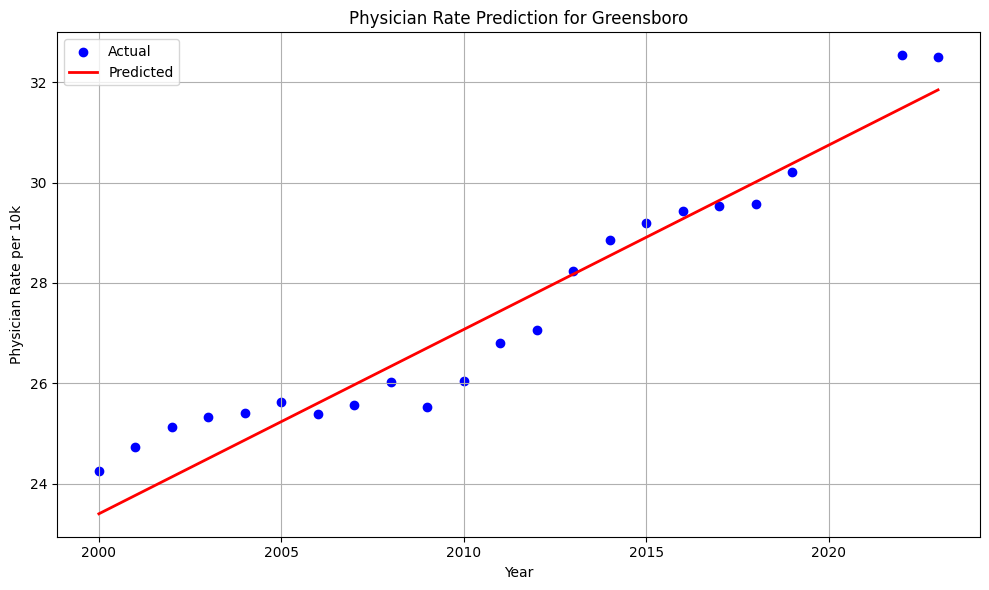

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("assets/data/Healthcare per rural area.csv")

df.columns = ["AHEC"] + [col.strip() for col in df.columns[1:]]
df_melted = df.melt(id_vars="AHEC", var_name="Year", value_name="PhysicianRate")
df_melted["Year"] = pd.to_numeric(df_melted["Year"], errors="coerce")
df_melted = df_melted.dropna()

region = "Greensboro"
region_df = df_melted[df_melted["AHEC"] == region]

X = region_df["Year"].values.reshape(-1, 1)
y = region_df["PhysicianRate"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model for region: {region}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Actual", color="blue")
plt.plot(X, model.predict(X), label="Predicted", color="red", linewidth=2)
plt.title(f"Physician Rate Prediction for {region}")
plt.xlabel("Year")
plt.ylabel("Physician Rate per 10k")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#For Greensboro (or any selected Area Health Care Center region), the slope of the regression line tells me whether 
# physician rates are going up, positive trend. 

In [ ]:
# This code prepares and cleans my data using a pipeline, handles missing values, and standardizes the feature columns.
# I used this to apply different transformations to different columns. Here, I applied SimpleImputer to fill missing values 
# and StandardScaler to scale numeric features
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

csv_path = "assets/data/Healthcare per rural area.csv"
df = pd.read_csv(csv_path)

df.columns = ["AHEC"] + [col.strip() for col in df.columns[1:]]

df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors="coerce")

X = df.drop("AHEC", axis=1)  
y = df["AHEC"]  

preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="mean")),  
            ("scaler", StandardScaler())  
        ]), X.columns) 
    ])

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", FunctionTransformer())  
])

pipeline.fit(X, y)

X_transformed = pipeline.transform(X)

X_transformed_df = pd.DataFrame(X_transformed, columns=X.columns)

plt.figure(figsize=(12, 6))
plt.imshow(X_transformed_df, aspect="auto", interpolation="nearest", cmap="YlOrRd")
plt.colorbar(label="Scaled Physician Rate per 10k")
plt.title("Heatmap of Transformed Physician Rates per 10k by AHEC Region", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("AHEC Region", fontsize=14)
plt.xticks(ticks=range(len(X_transformed_df.columns)), labels=X_transformed_df.columns, rotation=45, ha="right")
plt.yticks(ticks=range(len(df["AHEC"])), labels=df["AHEC"])
plt.tight_layout()
plt.show()


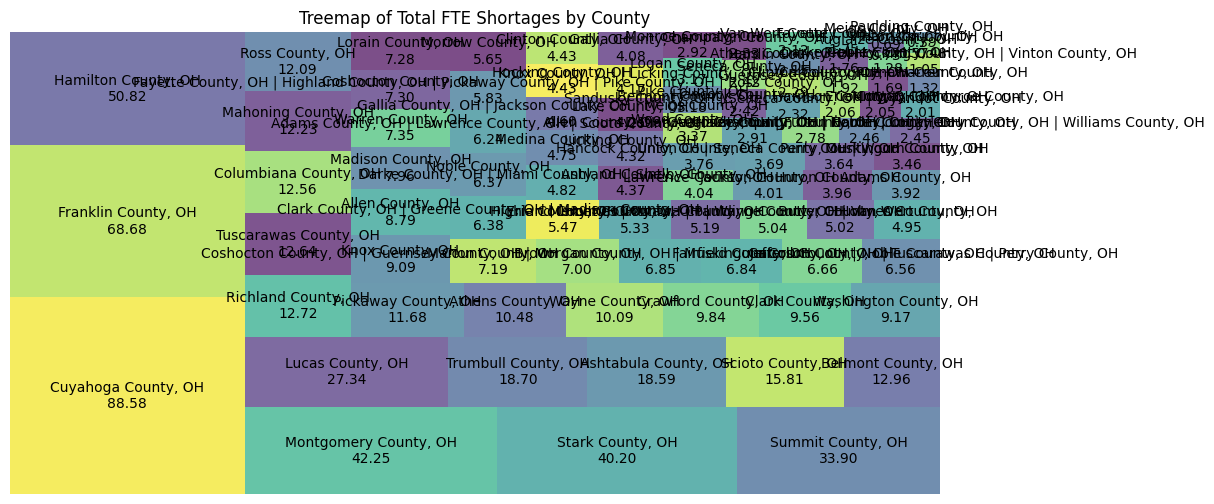

In [ ]:
import squarify
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("assets/data/Hpsa_Find_Export.csv")

df["HPSA FTE Short"] = pd.to_numeric(df["HPSA FTE Short"], errors="coerce")

df["County Name"] = df["County Name"].astype(str)

county_ftes = df.groupby("County Name")["HPSA FTE Short"].sum().reset_index()

county_ftes = county_ftes[county_ftes["HPSA FTE Short"] > 0]

county_ftes = county_ftes.sort_values("HPSA FTE Short", ascending=False)

labels = county_ftes.apply(lambda row: f"{row['County Name']}\n{row['HPSA FTE Short']:.2f}", axis=1)
sizes = county_ftes["HPSA FTE Short"]

plt.figure(figsize=(12, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.7)
plt.axis("off")
plt.title("Treemap of Total FTE Shortages by County")
plt.show()


## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

In [ ]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 1271 bytes to source.py
